In [1]:
import numpy as np
import pandas as pd
!pip install openpyxl
!pip install statsmodels
!pip install requests
!pip install beautifulSoup4
import requests
from bs4 import BeautifulSoup as BS

%matplotlib inline

import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from openpyxl import load_workbook
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_absolute_percentage_error




warnings.filterwarnings("ignore")

In [115]:
#autoML, PyCaret
!pip install --pre pycaret

In [116]:
!pip install --upgrade pip setuptools wheel

In [117]:
!pip install pycaret

In [112]:
from tqdm import tqdm
from pycaret.regression import *


In [128]:
from pycaret.regression import load_model, predict_model
import plotly.express as px

## Let's create initial dataframe with all companies 

In [5]:
path = '/Users/tima/Desktop/цмф/Myprojects/reportforecast/oil_gas_train/' #directory of our reports
import os
files = os.listdir(path)

In [6]:
files

['CDEV.xlsx',
 'COG.xlsx',
 'CNX.xlsx',
 'FANG.xlsx',
 'AR.xlsx',
 'TALO.xlsx',
 'HES.xlsx',
 'MTDR.xlsx',
 '.DS_Store',
 'GDP.xlsx',
 'WLL.xlsx',
 'CRK.xlsx',
 'LPI.xlsx',
 'SBOW.xlsx',
 'RRC.xlsx',
 'CLR.xlsx',
 'К≠®£†8.xlsx',
 'APA.xlsx',
 'EOG.xlsx',
 'CRBO.xlsx',
 'VNOM.xlsx',
 'DVN.xlsx',
 'EQT.xlsx',
 'MUR.xlsx',
 'CHK.xlsx',
 'SD.xlsx',
 'OVV.xlsx',
 'MGY.xlsx',
 'ESTE.xlsx',
 'SWN.xlsx',
 'AMPY.xlsx',
 'NOG.xlsx',
 'MRO.xlsx',
 'DEN.xlsx',
 'BSM.xlsx',
 'LONE.xlsx',
 'XOG.xlsx',
 'CRC.xlsx',
 'BCEI.xlsx',
 'MNRL.xlsx',
 'BRY.xlsx',
 'SM.xlsx',
 'PVAC.xlsx',
 'PXD.xlsx',
 'COP.xlsx',
 'PDCE.xlsx',
 'WTI.xlsx',
 'OAS.xlsx',
 'EGY.xlsx',
 'XEC.xlsx',
 'TPL.xlsx',
 'BATL.xlsx',
 'REI.xlsx',
 'CPE.xlsx',
 'MCF.xlsx']

In [7]:
 #we have some problems with files because of '~$AMPY.xlsx': 
    #ValueError: File is not a recognized excel file

In [8]:
files[16]

'К≠®£†8.xlsx'

In [9]:
files[18]

'EOG.xlsx'

In [10]:
#we have to remove it ('~$AMPY.xlsx') 
files.pop(22)
files.pop(16)
files.pop(18)
files
#additionaly there is no such file in test data as 'К≠®£†8.xlsx', so we have to remove it too
#there is no such file in test data as 'CRBO.xlsx', so we have to remove it too

['CDEV.xlsx',
 'COG.xlsx',
 'CNX.xlsx',
 'FANG.xlsx',
 'AR.xlsx',
 'TALO.xlsx',
 'HES.xlsx',
 'MTDR.xlsx',
 '.DS_Store',
 'GDP.xlsx',
 'WLL.xlsx',
 'CRK.xlsx',
 'LPI.xlsx',
 'SBOW.xlsx',
 'RRC.xlsx',
 'CLR.xlsx',
 'APA.xlsx',
 'EOG.xlsx',
 'VNOM.xlsx',
 'DVN.xlsx',
 'MUR.xlsx',
 'CHK.xlsx',
 'SD.xlsx',
 'OVV.xlsx',
 'MGY.xlsx',
 'ESTE.xlsx',
 'SWN.xlsx',
 'AMPY.xlsx',
 'NOG.xlsx',
 'MRO.xlsx',
 'DEN.xlsx',
 'BSM.xlsx',
 'LONE.xlsx',
 'XOG.xlsx',
 'CRC.xlsx',
 'BCEI.xlsx',
 'MNRL.xlsx',
 'BRY.xlsx',
 'SM.xlsx',
 'PVAC.xlsx',
 'PXD.xlsx',
 'COP.xlsx',
 'PDCE.xlsx',
 'WTI.xlsx',
 'OAS.xlsx',
 'EGY.xlsx',
 'XEC.xlsx',
 'TPL.xlsx',
 'BATL.xlsx',
 'REI.xlsx',
 'CPE.xlsx',
 'MCF.xlsx']

In [11]:
len(files)

52

In [12]:
files[0]

'CDEV.xlsx'

In [97]:
pd.read_excel(path + files[0]).head(30
                                   )

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDEV US Equity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Centennial Resource Developmen (CDEV),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,Drivers Lookup->,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BQL Lookup->,125,...,153,154,155,156,157,158,159,160,161,162
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financials lookup -1 Q->,NaN,...,44,46,47,48,49,51,52,53,54,56
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financials lookup -1 S / -2Q->,NaN,...,43,44,46,47,48,49,51,52,53,54
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financials lookup -3Q->,NaN,...,42,43,44,46,47,48,49,51,52,53


In baseline model we'll use only laggs of target variables and some financial regressors 

In [14]:
#Loop for each filename and add needed rows
b = 1
dataframe = []
for i in range(len(files)):
    if files[i].endswith('.xlsx'):
#         df = load_workbook(filename = os.path.join(path, filename))
        df = pd.read_excel(path + files[i])
#     os.path.join(path,filename)
#         sheet = df.active
        #add significant columns
        revenue = df.iloc[28].tolist()[9:47] #starting from J = 10 to AU = 47
        date = df.iloc[27].tolist()[9:47]
        oper_income = df.iloc[42].tolist()[9:47]
#         roa = df.iloc[112].tolist()[9:47]
#         roe = df.iloc[115].tolist()[9:47]
#         gross_margin = df.iloc[356].tolist()[9:47]
#         capex_ebitda = df.iloc[354].tolist()[9:47]
        
        company_name = [files[i]]*38
        company_number = [b]*38
#         revenue = sheet[30, "J:AU"]
#         date = sheet[29, "J:AU"]
#         net_income = sheet[64, "J:AU"]
#         company_name = [filename]*37
#         company_number = [i]*37
        b = b + 1
        df_result = pd.DataFrame({'Date': date, 'Company_name': company_name,'Company_number': company_number, 'Oper_income': oper_income, 
                                  'Revenue': revenue, })
        df_result['lagged_revenue_1'] = df_result.Revenue.shift(periods = 1)
        df_result['lagged_revenue_2'] = df_result.Revenue.shift(periods = 2)
        df_result['lagged_revenue_3'] = df_result.Revenue.shift(periods = 3)
        df_result['lagged_operincom_1'] = df_result.Oper_income.shift(periods = 1)
        df_result['lagged_operincom_2'] = df_result.Oper_income.shift(periods = 2)
        df_result['lagged_operincom_3'] = df_result.Oper_income.shift(periods = 3)
        
        dataframe.append(df_result)

In [15]:
df_train = pd.concat(dataframe, ignore_index = True)
df_train

,Date,Company_name,Company_number,Oper_income,Revenue,lagged_revenue_1,lagged_revenue_2,lagged_revenue_3,lagged_operincom_1,lagged_operincom_2,lagged_operincom_3
0,2011-03-31,CDEV.xlsx,1,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-06-30,CDEV.xlsx,1,0.000,0.000,0.000,NaN,NaN,0.000,NaN,NaN
2,2011-09-30,CDEV.xlsx,1,0.000,0.000,0.000,0.000,NaN,0.000,0.000,NaN
3,2011-12-31,CDEV.xlsx,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2012-03-31,CDEV.xlsx,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
1933,2019-06-30,MCF.xlsx,51,-5.861,12.762,14.779,18.694,19.508,-3.246,-1.709,-6.876
1934,2019-09-30,MCF.xlsx,51,-7.042,12.547,12.762,14.779,18.694,-5.861,-3.246,-1.709
1935,2019-12-31,MCF.xlsx,51,-1.237,37.193,12.547,12.762,14.779,-7.042,-5.861,-3.246
1936,2020-03-31,MCF.xlsx,51,-5.117,34.573,37.193,12.547,12.762,-1.237,-7.042,-5.861


## EDA

In [16]:
df_train.isnull().sum()

Date                    0
Company_name            0
Company_number          0
Oper_income             0
Revenue                 0
lagged_revenue_1       51
lagged_revenue_2      102
lagged_revenue_3      153
lagged_operincom_1     51
lagged_operincom_2    102
lagged_operincom_3    153
dtype: int64

In [17]:
df_train = df_train.dropna()

In [18]:
#we have to drop unknown variables

In [19]:
df_train.isnull().sum()
#all unobserved data equals 0

Date                  0
Company_name          0
Company_number        0
Oper_income           0
Revenue               0
lagged_revenue_1      0
lagged_revenue_2      0
lagged_revenue_3      0
lagged_operincom_1    0
lagged_operincom_2    0
lagged_operincom_3    0
dtype: int64

In [20]:
df_train1 = df_train.loc[(df_train['lagged_revenue_3'] != 0)] #delete all Nones as zeros
#we can figure out the value of operating income from revenue, hence, it is apparent that we may check only 0-ro values for revenue is it equal 0 or no

In [21]:
df_train1


,Date,Company_name,Company_number,Oper_income,Revenue,lagged_revenue_1,lagged_revenue_2,lagged_revenue_3,lagged_operincom_1,lagged_operincom_2,lagged_operincom_3
23,2016-12-31,CDEV.xlsx,1,-1.932,30.771000,29.273,29.390,23.750,-1.775,0.056,-6.105
24,2017-03-31,CDEV.xlsx,1,7.653,60.700000,30.771,29.273,29.390,-1.932,-1.775,0.056
25,2017-06-30,CDEV.xlsx,1,23.984,91.337000,60.700,30.771,29.273,7.653,-1.932,-1.775
26,2017-09-30,CDEV.xlsx,1,26.977,112.001000,91.337,60.700,30.771,23.984,7.653,-1.932
27,2017-12-31,CDEV.xlsx,1,69.143,165.196992,112.001,91.337,60.700,26.977,23.984,7.653
...,...,...,...,...,...,...,...,...,...,...,...
1933,2019-06-30,MCF.xlsx,51,-5.861,12.762000,14.779,18.694,19.508,-3.246,-1.709,-6.876
1934,2019-09-30,MCF.xlsx,51,-7.042,12.547000,12.762,14.779,18.694,-5.861,-3.246,-1.709
1935,2019-12-31,MCF.xlsx,51,-1.237,37.193000,12.547,12.762,14.779,-7.042,-5.861,-3.246
1936,2020-03-31,MCF.xlsx,51,-5.117,34.573000,37.193,12.547,12.762,-1.237,-7.042,-5.861


In [22]:
df_train1.describe()

,Company_number,Oper_income,Revenue,lagged_revenue_1,lagged_revenue_2,lagged_revenue_3,lagged_operincom_1,lagged_operincom_2,lagged_operincom_3
count,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000
mean,25.718710,136.792782,853.804721,881.715276,898.790026,935.290313,149.542590,156.231896,161.490180
std,15.035817,400.296951,1750.386139,1815.096543,1878.895099,2318.140671,411.072751,428.853662,449.634373
min,1.000000,-2540.000000,-13.403000,-6.934000,-6.934000,-36.210000,-2540.000000,-2540.000000,-2540.000000
25%,13.000000,4.072250,75.441750,75.441750,73.893000,72.593250,5.718500,6.115000,5.849729
50%,25.000000,36.061000,254.539000,255.441504,253.294000,245.668000,39.294000,39.593500,38.935346
75%,40.000000,135.465008,782.824016,800.850992,797.593504,791.908000,144.624000,146.956752,150.591256
max,51.000000,3605.846272,15502.999552,16257.000448,16890.000384,54174.998528,3701.076992,4365.076992,5224.999936


In [23]:
df_train1.groupby('Company_name')['Revenue', 'Oper_income'].describe()
#the result shows us that not every company has reports for the whole period 

Revenue                                                      \
               count         mean          std          min          25%   
Company_name                                                               
AMPY.xlsx       32.0    89.728968    40.791254    35.171000    57.655750   
APA.xlsx        35.0  2388.571436  1214.704139   596.000000  1468.500032   
AR.xlsx         32.0   698.039250   354.858798     0.000000   555.378736   
BATL.xlsx       35.0   146.081972    97.842191    24.374000    52.636000   
BCEI.xlsx       35.0    78.209649    32.717693    34.444000    52.120500   
BRY.xlsx         8.0   151.558622   118.131680     0.000000    65.767500   
BSM.xlsx        20.0   115.594900    44.744167    38.529000    85.997250   
CDEV.xlsx       15.0   172.444467    75.851454    30.771000   101.669000   
CHK.xlsx        35.0  2999.400015  1118.946311   507.000000  2164.000000   
CLR.xlsx        35.0   834.539743   336.827843   114.118000   614.198528   
CNX.xlsx        35.0   642.157573   318.989163   238.336992   407.387504   
COG.xlsx        35.0   418.362485   118.176387   246.816000   308.362992   
COP.xlsx        35.0  9715.942832  3544.957479  2748.999936  6951.000064   
CPE.xlsx        35.0    80.780743    63.796055    23.163000    32.110500   
CRC.xlsx        21.0   579.952381   138.090360   276.000000   481.000000   
CRK.xlsx        35.0   106.964143    56.881499    36.163000    63.996500   
DEN.xlsx        35.0   424.165800   161.155939   163.010000   308.081504   
DVN.xlsx        35.0  2631.828575   970.200696   394.000000  2099.500032   
EGY.xlsx        35.0    28.660114    14.582706    10.976000    18.208500   
EOG.xlsx        35.0  3244.627156   925.480728  1357.453952  2610.525568   
ESTE.xlsx       35.0    19.387057    17.989849     2.347000     3.730500   
FANG.xlsx       33.0   326.082180   334.516354    13.922000    96.948000   
GDP.xlsx        35.0    33.964800    19.159147     6.245000    15.527000   
HES.xlsx        35.0  2342.342853  1737.423960   833.000000  1371.000000   
LONE.xlsx       15.0    35.969200    13.529541    17.220000    24.222000   
LPI.xlsx        33.0   205.405091    41.217124   147.995008   171.879008   
MCF.xlsx        35.0    32.614133    18.043388    12.547000    19.298000   
MGY.xlsx         9.0   212.270668    54.616939    82.839000   199.987008   
MNRL.xlsx        3.0    26.166333    11.763384    12.605000    22.442500   
MRO.xlsx        35.0  1960.514288  1115.898144   496.000000  1196.000000   
MTDR.xlsx       35.0   123.711062    76.430145    17.859758    70.537500   
MUR.xlsx        35.0  1417.739749  1821.401676   209.864992   500.533504   
NOG.xlsx        35.0   105.259266   101.299522    -6.934000    57.285028   
OAS.xlsx        35.0   323.859314   123.327860   117.866000   237.191000   
OVV.xlsx        35.0  1453.714293   467.088834   726.000000  1121.000064   
PDCE.xlsx       35.0   197.892283    94.657694    61.011000   119.215000   
PVAC.xlsx       35.0    87.245400    35.905628   -13.403000    65.384500   
PXD.xlsx        35.0  1363.276206   593.185808   718.350976   907.882528   
REI.xlsx        28.0    18.800222    15.505227     0.000000     7.707506   
RRC.xlsx        35.0   531.094513   152.282659   314.384992   417.100000   
SBOW.xlsx       35.0    87.247570    45.352715    24.846000    50.723000   
SD.xlsx         35.0   253.813199   262.126833    16.655000    86.136500   
SM.xlsx         35.0   410.873430   122.467368   169.540992   337.638000   
SWN.xlsx        35.0   800.749919   143.412632   530.000000   699.000000   
TALO.xlsx       35.0   182.307569    64.025417    80.877000   115.857500   
TPL.xlsx        35.0    39.889496    41.629289     6.723783    11.840018   
VNOM.xlsx       23.0    45.513391    25.910909    14.194000    19.957500   
WLL.xlsx        35.0   497.346997   165.247504    91.600000   373.604000   
WTI.xlsx        35.0   165.517886    59.303331    77.715000   123.858000   
XEC.xlsx        35.0   474.718771   110.584428   245.668000  

COP.xlsx has the maximum revenue value, it's interesting to check its plot

In [24]:
df_cop = df_train1.loc[df_train1['Company_name'] == 'COP.xlsx']
df_cop.tail(5)

,Date,Company_name,Company_number,Oper_income,Revenue,lagged_revenue_1,lagged_revenue_2,lagged_revenue_3,lagged_operincom_1,lagged_operincom_2,lagged_operincom_3
1553,2019-06-30,COP.xlsx,41,1906.000000,7952.999936,9150.000128,9665.999872,9448.999936,1800.999936,2047.000064,2263.000064
1554,2019-09-30,COP.xlsx,41,1528.999936,7756.000256,7952.999936,9150.000128,9665.999872,1906.000000,1800.999936,2047.000064
1555,2019-12-31,COP.xlsx,41,1708.000000,7708.000256,7756.000256,7952.999936,9150.000128,1528.999936,1906.000000,1800.999936
1556,2020-03-31,COP.xlsx,41,694.000000,6158.000128,7708.000256,7756.000256,7952.999936,1708.000000,1528.999936,1906.000000
1557,2020-06-30,COP.xlsx,41,-1188.000000,2748.999936,6158.000128,7708.000256,7756.000256,694.000000,1708.000000,1528.999936


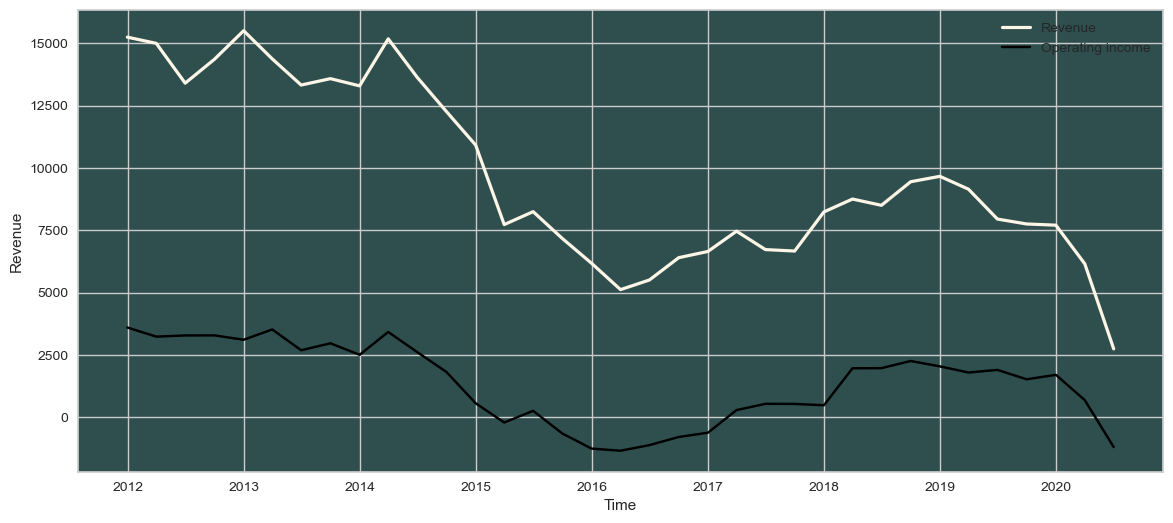

In [25]:
plt.figure(figsize = (14,6))
ax = sns.lineplot(df_cop['Date'], df_cop['Revenue'], label = 'Revenue', color = 'oldlace', linewidth = 2.3)
sns.lineplot(df_cop['Date'], df_cop['Oper_income'],  label = 'Operating income', color = 'black')
ax.set_facecolor('darkslategray')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend(loc = 'upper right')
plt.show()

# Baseline model + metric

For the baseline model I'd like to take ARIMA. But we have to understand the stationarity of our time series. Hence, let's implement Augmented Dickey-Fuller test. Furthermore, we have to find p and q. I'd like to apply this test to COP.xlsx time series and find p and q, and such p and q I'd like to use in my baseline model (it's just my own assumption, further we will select parameteres individually for each company). 

### Finding the value of the d parameter 

In [26]:
result = adfuller(df_cop['Revenue'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))


ADF Statistic: -0.768397
p-value: 0.828229
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


Here we can see that the p-value is more than 0.05 this means our null hypothesis will be rejected and we will take this series as non-stationary. There is no such method that can tell us how much value of d will be optimal. However, the value of differencing can be optimal till 2 so we will try our time series in both. Pandas provide this option of differencing. Let’s utilize this.

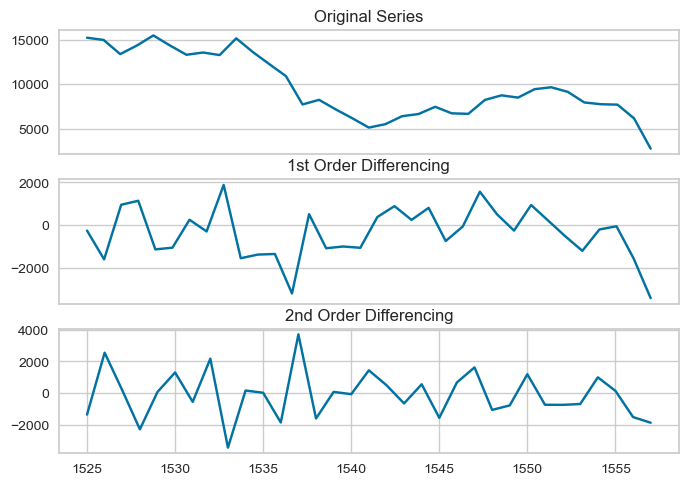

In [27]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df_cop.Revenue); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df_cop.Revenue.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df_cop.Revenue.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

Here we can see how the time series has become stationary. One thing which is noticeable here is in first-order differencing we have fewer noises in the data while after 1st order there is an increase in the noise. So we can select 1st order differencing for our model. We can also verify this using an autocorrelation plot.  To be confident in choice let's take one more time Augmented Dickey-Fuller test for the first diff.


In [28]:
result1 = adfuller(df_cop.Revenue.diff()
                   .dropna())
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
  print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.089725
p-value: 0.001007
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


Here we can see that the p-value is less than 0.05 this means our null hypothesis will be not rejected and we will take this series as stationary. So, d = 1.

#### As usual d = 1 is enough to get stationary series (even in our data we can figure it out), so we will use such d in our baseline model. 

### Finding the value of the p parameter

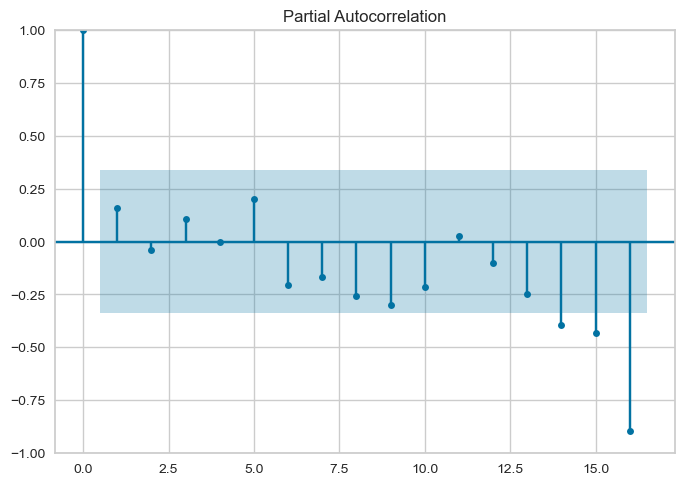

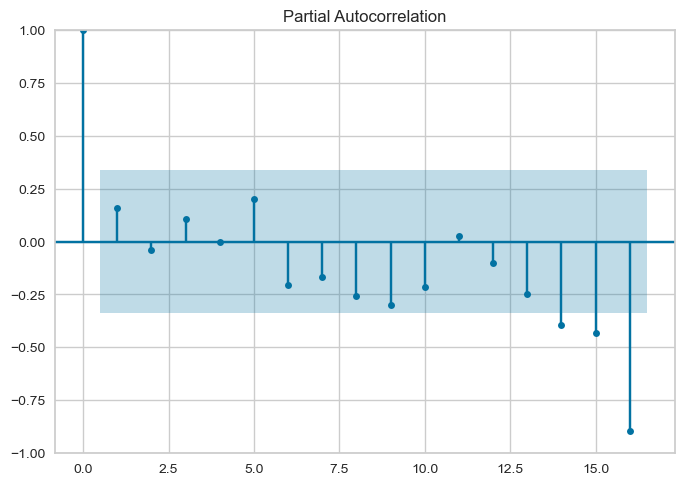

In [29]:
plot_pacf(df_cop.Revenue.diff().dropna())

Here we can see that the first lag is significantly out of the limit so we can select the order of the p as 1. 

### Finding the value of the q parameter

To find out the value of q we can use the ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series. 

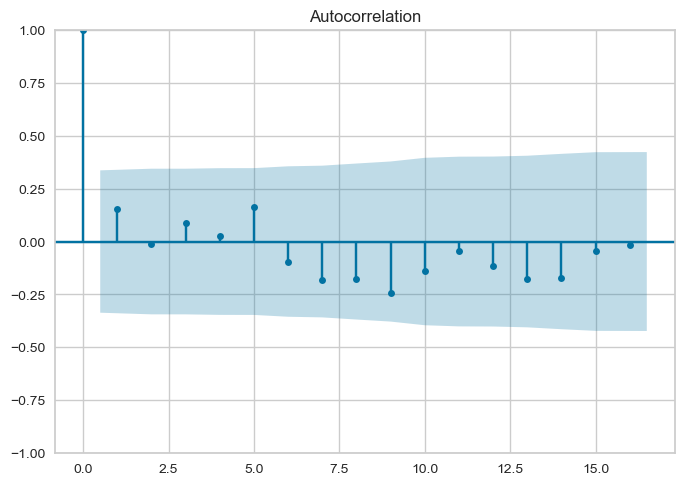

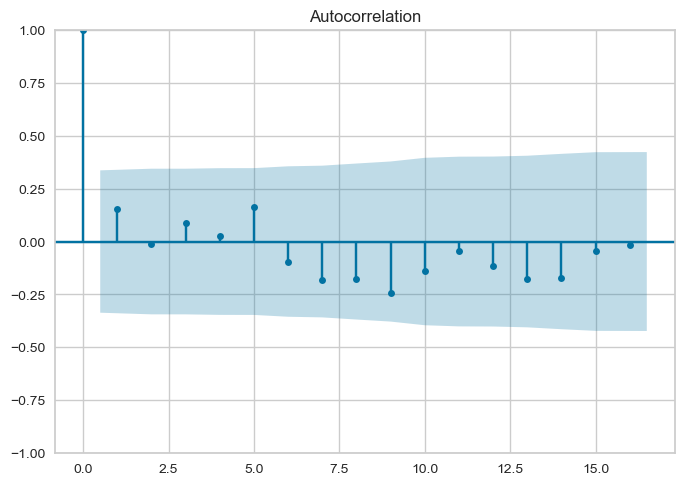

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_cop.Revenue.diff().dropna())

Here we can see that 1 of the lags are out of the significance limit so we can say that the optimal value of our q (MA) is 1. So, for the baseline model I'll use ARIMA(p = 1, d = 1, q = 1)

### Baseline model - ARIMA(1,1,1)



### Metric - MAPE


As we know, scale dependent metrics are not suitable for comparing different time series. Percentage Error Metrics solve this problem. They are scale independent and used to compare forecast performance between different time series. 
In our analysis we'll use MAPE. Why? Because the mean absolute percentage error (MAPE) is one of the most popular used error metrics in time series forecasting. It is calculated by taking the average (mean) of the absolute difference between actuals and predicted values divided by the actuals. MAPE’s advantages are it’s scale-independency and easy interpretability.


# Building baseline model

In [31]:
#to build baseline model and then check its accuracy we have to get test_data
path_totestdata = '/Users/tima/Desktop/цмф/Myprojects/reportforecast/oil_gas_train_test/'

In [32]:
len(files)

52

In [33]:
d = 1
dataframe1 = []
for i in range(len(files)):
    if files[i].endswith('.xlsx'):
#         df = load_workbook(filename = os.path.join(path, filename))
        df = pd.read_excel(path_totestdata + files[i])
#     os.path.join(path,filename)
#         sheet = df.active
        #add significant columns
        revenue1 = df.iloc[28].tolist()[47:52] #starting from J = 10 to AU = 47
        date1 = df.iloc[27].tolist()[47:52]
        oper_income1 = df.iloc[42].tolist()[47:52]
#         roa = df.iloc[112].tolist()[9:47]
#         roe = df.iloc[115].tolist()[9:47]
#         gross_margin = df.iloc[356].tolist()[9:47]
#         capex_ebitda = df.iloc[354].tolist()[9:47]
        
        company_name1 = [files[i]]* 4 
        company_number1 = [d]* 4
#         revenue = sheet[30, "J:AU"]
#         date = sheet[29, "J:AU"]
#         net_income = sheet[64, "J:AU"]
#         company_name = [filename]*37
#         company_number = [i]*37
        d = d + 1
        df_result_test = pd.DataFrame({'Date': date1, 'Company_name': company_name1,'Company_number': company_number1, 'Oper_income': oper_income1, 
                                  'Revenue': revenue1})
        df_result_test['lagged_revenue_1'] = df_result_test.Revenue.shift(periods = 1)
        df_result_test['lagged_revenue_2'] = df_result_test.Revenue.shift(periods = 2)
        df_result_test['lagged_revenue_3'] = df_result_test.Revenue.shift(periods = 3)
        df_result_test['lagged_operincom_1'] = df_result_test.Oper_income.shift(periods = 1)
        df_result_test['lagged_operincom_2'] = df_result_test.Oper_income.shift(periods = 2)
        df_result_test['lagged_operincom_3'] = df_result_test.Oper_income.shift(periods = 3)
        
        dataframe1.append(df_result_test)

In [34]:
df_test = pd.concat(dataframe1, ignore_index = True)
df_test

,Date,Company_name,Company_number,Oper_income,Revenue,lagged_revenue_1,lagged_revenue_2,lagged_revenue_3,lagged_operincom_1,lagged_operincom_2,lagged_operincom_3
0,2020-09-30,CDEV.xlsx,1,-46.011000,114.615000,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-31,CDEV.xlsx,1,-11.545000,142.859008,114.615000,NaN,NaN,-46.011,NaN,NaN
2,2021-03-31,CDEV.xlsx,1,32.885000,169.504992,142.859008,114.615000,NaN,-11.545,-46.011,NaN
3,2021-06-30,CDEV.xlsx,1,48.578000,195.064000,169.504992,142.859008,114.615000,32.885,-11.545,-46.011
4,2020-09-30,COG.xlsx,2,-7.564000,291.040992,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
199,2021-06-30,CPE.xlsx,50,206.071008,440.399008,359.880992,295.968000,290.025984,153.376,74.558,57.714
200,2020-09-30,MCF.xlsx,51,2.521000,31.348000,NaN,NaN,NaN,NaN,NaN,NaN
201,2020-12-31,MCF.xlsx,51,-0.874000,29.157000,31.348000,NaN,NaN,2.521,NaN,NaN
202,2021-03-31,MCF.xlsx,51,13.620000,59.950000,29.157000,31.348000,NaN,-0.874,2.521,NaN


In [35]:
df_test.head(7)

,Date,Company_name,Company_number,Oper_income,Revenue,lagged_revenue_1,lagged_revenue_2,lagged_revenue_3,lagged_operincom_1,lagged_operincom_2,lagged_operincom_3
0,2020-09-30,CDEV.xlsx,1,-46.011000,114.615000,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-31,CDEV.xlsx,1,-11.545000,142.859008,114.615000,NaN,NaN,-46.011,NaN,NaN
2,2021-03-31,CDEV.xlsx,1,32.885000,169.504992,142.859008,114.615000,NaN,-11.545,-46.011,NaN
3,2021-06-30,CDEV.xlsx,1,48.578000,195.064000,169.504992,142.859008,114.615,32.885,-11.545,-46.011
4,2020-09-30,COG.xlsx,2,-7.564000,291.040992,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-12-31,COG.xlsx,2,121.312000,414.846016,291.040992,NaN,NaN,-7.564,NaN,NaN
6,2021-03-31,COG.xlsx,2,177.743008,459.680000,414.846016,291.040992,NaN,121.312,-7.564,NaN


In [36]:
df_test.groupby('Company_name')['Revenue', 'Oper_income'].describe()

Revenue                                                      \
               count         mean          std          min          25%   
Company_name                                                               
AMPY.xlsx        4.0    65.424750    13.185172    52.745000    55.255250   
APA.xlsx         4.0  1505.249984   451.989225  1046.000000  1222.249952   
AR.xlsx          4.0  1123.696016   476.382926   489.368000   990.155792   
BATL.xlsx        4.0    52.200250     9.656506    43.802000    44.786750   
BCEI.xlsx        4.0    87.921752    45.872833    58.858000    61.690750   
BRY.xlsx         4.0    94.443000    25.441703    61.366000    82.653250   
BSM.xlsx         4.0    60.294500    13.814571    43.742000    54.767000   
CDEV.xlsx        4.0   155.510750    34.606489   114.615000   135.798006   
CHK.xlsx         4.0  1002.750016   233.424347   693.000000   892.500000   
CLR.xlsx         4.0   997.212752   269.584295   700.270976   803.297744   
CNX.xlsx         4.0   372.384248    48.692084   303.920000   357.827000   
COG.xlsx         4.0   372.558504    78.138955   291.040992   316.260504   
COP.xlsx         4.0  7314.749824  2782.877313  4385.999872  5214.749824   
CPE.xlsx         4.0   346.568496    70.092447   290.025984   294.482496   
CRC.xlsx         4.0   376.500000    55.620740   304.000000   348.250000   
CRK.xlsx         4.0   284.240000    77.615329   178.011008   250.581008   
DEN.xlsx         4.0   215.181000    15.144670   204.167008   206.211496   
DVN.xlsx         4.0  1653.999984   582.825847  1067.000000  1294.250000   
EGY.xlsx         4.0    29.402500    16.593828    12.557000    16.831250   
EOG.xlsx         4.0  3482.029440   828.232179  2595.570944  2879.052992   
ESTE.xlsx        4.0    60.741250    25.973894    36.675000    39.954000   
FANG.xlsx        4.0   968.999984   309.297045   710.000000   724.250000   
GDP.xlsx         4.0    30.052250     5.660367    23.063000    27.656000   
HES.xlsx         4.0  1489.250016   322.751060  1159.000064  1280.499968   
LONE.xlsx        4.0    36.960250     7.391402    29.889000    31.554000   
LPI.xlsx         4.0   221.552504    15.811301   198.051008   219.448496   
MCF.xlsx         4.0    51.023750    25.876550    29.157000    30.800250   
MGY.xlsx         4.0   182.172754    58.218293   121.067000   142.193006   
MNRL.xlsx        4.0    29.605500     7.336584    23.078000    23.589500   
MRO.xlsx         4.0  1008.500016   247.284608   764.000000   814.250000   
MTDR.xlsx        4.0   287.788256    86.180617   216.419008   222.281008   
MUR.xlsx         4.0   415.241504    86.409173   330.206016   366.158016   
NOG.xlsx         4.0    35.899500    14.886240    21.397000    23.953000   
OAS.xlsx         4.0   319.849748    41.814784   258.242000   314.207756   
OVV.xlsx         4.0  1562.000000   278.457657  1190.000000  1443.500000   
PDCE.xlsx        4.0   361.396496    91.168018   228.868992   345.346992   
PVAC.xlsx        4.0    87.414250    26.662328    66.992000    68.806250   
PXD.xlsx         4.0  2547.500032   873.801116  1776.000000  1923.000000   
REI.xlsx         4.0    37.520213     7.820545    31.351672    31.437826   
RRC.xlsx         4.0   577.679008    67.212600   509.848992   525.519504   
SBOW.xlsx        4.0    63.941250    18.233892    45.699000    51.522750   
SD.xlsx          4.0    31.452750     3.043652    27.676000    29.656000   
SM.xlsx          4.0   402.250512   128.139911   281.015008   310.472752   
SWN.xlsx         4.0   894.250000   210.466743   624.000000   779.250000   
TALO.xlsx        4.0   220.631000    78.472727   135.136992   165.567504   
TPL.xlsx         4.0    82.193500    10.260637    74.304000    74.363250   
VNOM.xlsx        4.0    87.597750    22.568411    62.942000    72.977750   
WLL.xlsx         4.0   263.738256    78.945798   183.642000   205.116000   
WTI.xlsx         4.0    96.920750    17.782858    74.468000    89.623250   
XEC.xlsx         4.0   522.937480   114.209428   415.332992  

In [37]:
files[36]
# There are problems with arime:
# ValueError: The computed initial MA coefficients are not invertible
# You should induce invertibility, choose a different model order, or you can
# pass your own start_params. 

'MNRL.xlsx'

In [38]:
model1 = ARIMA(revenue, order = (1,1,1))
model_fit = model1.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   38
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -137.870
Date:                Wed, 01 Feb 2023   AIC                            281.741
Time:                        15:56:41   BIC                            286.573
Sample:                             0   HQIC                           283.444
                                 - 38                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0059      1.372     -0.004      0.997      -2.696       2.684
ma.L1          0.1427      1.343      0.106      0.915      -2.489       2.775
sigma2       100.8926     15.813      6.380      0.000      69.900     131.886
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                32.65
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             1.39
Prob(H) (two-sided):                  0.20   Kurtosis:                         6.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Revenue predict

In [39]:
yhat_list = []
test_labels_list = []

for i in range(len(files)):
    if files[i].endswith('.xlsx'):
        df = pd.read_excel(path + files[i])
        df1 = pd.read_excel(path_totestdata + files[i])
        revenue_train = df.iloc[28].tolist()[9:47] 
        
        revenue_test = df1.iloc[28].tolist()[47:52]
        test_labels_list.append(revenue_test)
        revenue = []
        
        for n in revenue_train:
            if n != 0:
                revenue.append(n)

    
        
        model = ARIMA(revenue, order = (1,1,1))
        model_fit = model.fit()
        
        yhat = model_fit.predict(len(revenue), len(revenue) + len(revenue_test) - 1)
        yhat_list.append(yhat)
        
        

In [40]:
for i in range(5):
    print(test_labels_list[i], yhat_list[i])

[114.615, 142.859008, 169.504992, 195.064] [ 31.44910565  -5.60748671 -31.93102729 -50.63023154]
[291.040992, 414.846016, 459.68, 324.667008] [329.67170823 330.18788261 330.08832844 330.10752938]
[303.92, 392.707008, 417.113984, 375.796] [362.69865194 356.89048587 359.68944149 358.34062459]
[710, 729, 1080.999936, 1356] [489.32832885 476.02428096 474.79232139 474.6782415 ]
[1644.132992, 1157.085056, 1204.198016, 489.368] [970.13839106 970.85012789 971.0036163  971.03671658]


In [41]:
print(len(yhat_list), len(test_labels_list))

51 51


In [42]:
df_test.head(5)

,Date,Company_name,Company_number,Oper_income,Revenue,lagged_revenue_1,lagged_revenue_2,lagged_revenue_3,lagged_operincom_1,lagged_operincom_2,lagged_operincom_3
0,2020-09-30,CDEV.xlsx,1,-46.011,114.615000,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-31,CDEV.xlsx,1,-11.545,142.859008,114.615000,NaN,NaN,-46.011,NaN,NaN
2,2021-03-31,CDEV.xlsx,1,32.885,169.504992,142.859008,114.615000,NaN,-11.545,-46.011,NaN
3,2021-06-30,CDEV.xlsx,1,48.578,195.064000,169.504992,142.859008,114.615,32.885,-11.545,-46.011
4,2020-09-30,COG.xlsx,2,-7.564,291.040992,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
y_hat_res = np.concatenate(yhat_list, axis = 0)
test_res = np.concatenate(test_labels_list, axis = 0)

result_of_arima = mean_absolute_percentage_error(test_res,y_hat_res)

print(result_of_arima)

0.6733570021523801


So, we get 67% of MAPE -> weak and inaccurate forecasting

## Income predict

In [44]:
yhat_list_income = []
test_labels_list_income = []

for i in range(len(files)):
    if files[i].endswith('.xlsx'):
        df = pd.read_excel(path + files[i])
        df1 = pd.read_excel(path_totestdata + files[i])
        income_train = df.iloc[42].tolist()[9:47] 
        
        income_test = df1.iloc[42].tolist()[47:52]
        test_labels_list_income.append(income_test)
        income = []
        
        for n in income_train:
            if n != 0:
                income.append(n)

    
        
        model = ARIMA(income, order = (1,1,1))
        model_fit = model.fit()
        
        yhat = model_fit.predict(len(income), len(income) + len(income_test) - 1)
        yhat_list_income.append(yhat)
        

In [45]:
print(len(yhat_list_income), len(test_labels_list_income))

51 51


In [46]:
for i in range(5):
    print(test_labels_list_income[i], yhat_list_income[i])

[-46.011, -11.545, 32.885, 48.578] [-79.17655326 -76.3541746  -77.92238757 -77.05103322]
[-7.564, 121.312, 177.743008, 60.064] [64.86296475 72.7843643  78.5379654  82.7170155 ]
[50.57, 109.256, 139.384, 113.393] [112.86462764 110.39918112 110.69060576 110.65615832]
[187, 238, 550, 634] [70.66377406 78.05973893 75.61078911 76.42168469]
[540.595008, 63.273, 123.11, -652.568] [-11.27189579  35.9374277   61.99515608  76.37801858]


In [47]:
y_hat_res_income = np.concatenate(yhat_list_income, axis = 0)
test_res_income = np.concatenate(test_labels_list_income, axis = 0)

result_of_arima_income = mean_absolute_percentage_error(test_res_income,y_hat_res_income)

print(result_of_arima_income)

5.569798106772509


So, we get 557% of MAPE -> super weak and inaccurate forecasting
We have to switch our model to more usefull and accurate. 

## Cross-validation for time-series
"cross-validation on a rolling basis",
source: https://habr.com/ru/company/ods/blog/327242/

or Time Series Split Cross-Validation, source: https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

In [48]:
def timeseriesCVscore(cross_validation):
    tscv = TimeSeriesSplit(n_splits = 4)
    mape = []
    for train_index, test_index in tscv.split(cross_validation):
        cv_train, cv_test = cross_validation.iloc[train_index], cross_validation.iloc[test_index]
    
        
        model = ARIMA(cv_train, order = (1,1,1))
        model_fit = model.fit()
    
        predictions = model_fit.predict(cv_test.index.values[0], cv_test.index.values[-1])
        true_values = cv_test.values
        mape.append(mean_absolute_percentage_error(true_values, predictions))
    
    print("MAPE: {}".format(np.mean(mape)))


In [49]:
timeseriesCVscore(df_cop['Revenue'])

MAPE: 0.30050295364531954


Well, ARIMA(1,1,1) more or less applicable for COP company, revenue [reasonable forecasting], but not for other companies according to MAPE results for baseline model

In [50]:
timeseriesCVscore(df_cop['Oper_income'])

MAPE: 2.1020531356194736


Not applicable for income predictions

## Download macrodata

For macrodata features I'd like to use:
* Crude Oil Production
* Natural Gas Liquids Production
* Petroleum Products Supplied
* Petroleum Stock Change

source: https://www.eia.gov

In [51]:
url = 'https://www.eia.gov'

In [52]:
page = requests.get(url)

In [53]:
print(page.status_code)

200


In [54]:
soup = BS(page.text, "html.parser")

In [55]:
print(soup)

<!DOCTYPE html>

<html>
<head>
<title>Homepage - U.S. Energy Information Administration (EIA)</title>
<meta content="Homepage - U.S. Energy Information Administration (EIA)" property="og:title"/>
<meta content="https://www.eia.gov/index.php" property="og:url"/>
<meta content="https://www.eia.gov/index.php" name="url"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0" name="viewport">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<meta content="en-us" http-equiv="Content-Language">
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="all" name="robots"/>
<meta content="EIA - Energy Information Administration" name="agency"/>
<meta content="official energy statistics, data, analysis and forecasting" name="subject"/>
<meta content="Energy Information Administration - EIA - Official Energy Statistics from the U.S. Government" name="Description"/>
<link href="//www.eia.gov/favicon.ico" rel="shortcut icon"/>
<link hr

In [56]:
url = 'https://www.eia.gov/dnav/pet/pet_move_imc1_k_a.htm'

result = requests.get(url).text

soup = BS(result, 'lxml')
table = soup.find_all('table')[3]
res = pd.DataFrame(columns=range(0, 10), index=[0])
row_marker = 0

for row in table.find_all('tr'):
  column_marker = 0
  columns = row.find_all('td')
  for column in columns:
    res.loc[row_marker, column_marker] = column.get_text()
    column_marker += 1
  row_marker += 1

res = res.replace({'\n':''}, regex=True)
res = res.dropna()
res

,0,1,2,3,4,5,6,7,8,9
5,Average,,Average,36.37,45.58,56.31,54.27,33.66,62.04,1973-2021
7,Persian Gulf,,Persian Gulf,38.76,50.16,66.55,61.43,36.06,66.72,1973-2021
9,Total OPEC,,Total OPEC,38.51,49.55,65.61,62.11,38.34,69.18,1973-2021
11,Non OPEC,,Non OPEC,34.81,43.30,51.41,52.36,33.22,60.93,1973-2021
13,Selected Countries,,Selected Countries,,,,,,,
15,Angola,,Angola,42.68,W,74.44,66.97,W,75.02,1973-2021
17,Colombia,,Colombia,35.28,48.34,62.51,60.61,36.03,66.15,1973-2021
19,Mexico,,Mexico,36.22,46.66,62.75,56.72,36.00,64.42,1973-2021
21,Nigeria,,Nigeria,46.20,54.77,71.41,67.21,W,73.83,1973-2021
23,Saudi Arabia,,Saudi Arabia,39.30,51.30,68.23,63.48,35.35,68.43,1973-2021


In [57]:
#So, it is more convenient to collect data by myself

In [58]:
macrodata = pd.read_csv('/Users/tima/Desktop/цмф/Myprojects/MacroData.csv', sep = ';')

In [59]:
macrodata.head(5)

,Date,"Crude Oil Production, Total, (Thousand Barrels per Day)",Real date,"Natural Gas Liquids Production, (Thousand Barrels per Day)","Petroleum Products Supplied, (Thousand Barrels per Day)","Petroleum Stock Change, (Thousand Barrels per Day)"
0,31.12.1972,"9175,935",01.01.1973,"1680,032","18712,645","-1718,323"
1,31.01.1973,"9395,214",01.02.1973,"1744,893","19094,143","-1407,357"
2,28.02.1973,"9271,935",01.03.1973,"1734,484","17216,226","672,806"
3,31.03.1973,"9291,9",01.04.1973,"1749,6","15920,533","871,267"
4,30.04.1973,"9262,387",01.05.1973,"1739,258","16625,806","658,032"


In [60]:
macrodata_new = macrodata.drop(['Real date'], axis = 1)

In [61]:
macrodata_new .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Date                                                        599 non-null    object
 1   Crude Oil Production, Total, (Thousand Barrels per Day)     599 non-null    object
 2   Natural Gas Liquids Production, (Thousand Barrels per Day)  599 non-null    object
 3   Petroleum Products Supplied,  (Thousand Barrels per Day)    599 non-null    object
 4   Petroleum Stock Change, (Thousand Barrels per Day)          599 non-null    object
dtypes: object(5)
memory usage: 23.5+ KB


In [62]:
macrodata_new['Crude Oil Production, Total, (Thousand Barrels per Day)'] = [
    x.replace(',', '.') for x in macrodata_new['Crude Oil Production, Total, (Thousand Barrels per Day)']]

In [63]:
macrodata_new['Crude Oil Production, Total, (Thousand Barrels per Day)'] = macrodata_new['Crude Oil Production, Total, (Thousand Barrels per Day)'].astype('float64')

In [64]:
macrodata_new

,Date,"Crude Oil Production, Total, (Thousand Barrels per Day)","Natural Gas Liquids Production, (Thousand Barrels per Day)","Petroleum Products Supplied, (Thousand Barrels per Day)","Petroleum Stock Change, (Thousand Barrels per Day)"
0,31.12.1972,9175.935,"1680,032","18712,645","-1718,323"
1,31.01.1973,9395.214,"1744,893","19094,143","-1407,357"
2,28.02.1973,9271.935,"1734,484","17216,226","672,806"
3,31.03.1973,9291.900,"1749,6","15920,533","871,267"
4,30.04.1973,9262.387,"1739,258","16625,806","658,032"
...,...,...,...,...,...
594,30.06.2022,11844.011,"6144,355","20345,04","336,965"
595,31.07.2022,11978.672,"6030,548","20601,033","-838,513"
596,31.08.2022,12267.997,"6095,567","20469,951","-866,237"
597,30.09.2022,11970.968,"6129,419","20435,387","-516,719"


In [65]:
macrodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 6 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Date                                                        599 non-null    object
 1   Crude Oil Production, Total, (Thousand Barrels per Day)     599 non-null    object
 2   Real date                                                   599 non-null    object
 3   Natural Gas Liquids Production, (Thousand Barrels per Day)  599 non-null    object
 4   Petroleum Products Supplied,  (Thousand Barrels per Day)    599 non-null    object
 5   Petroleum Stock Change, (Thousand Barrels per Day)          599 non-null    object
dtypes: object(6)
memory usage: 28.2+ KB


In [66]:
macrodata_new['Natural Gas Liquids Production, (Thousand Barrels per Day)'] = [
    x.replace(',', '.') for x in macrodata_new['Natural Gas Liquids Production, (Thousand Barrels per Day)']]
macrodata_new['Natural Gas Liquids Production, (Thousand Barrels per Day)'] = macrodata_new[
    'Natural Gas Liquids Production, (Thousand Barrels per Day)'].astype('float64')

macrodata_new['Petroleum Products Supplied,  (Thousand Barrels per Day)'] = [
    x.replace(',', '.') for x in macrodata_new['Petroleum Products Supplied,  (Thousand Barrels per Day)']]
macrodata_new['Petroleum Products Supplied,  (Thousand Barrels per Day)'] = macrodata_new[
    'Petroleum Products Supplied,  (Thousand Barrels per Day)'].astype('float64')

macrodata_new['Petroleum Stock Change, (Thousand Barrels per Day)'] = [
    x.replace(',', '.') for x in macrodata_new['Petroleum Stock Change, (Thousand Barrels per Day)']]
macrodata_new['Petroleum Stock Change, (Thousand Barrels per Day)'] = macrodata_new[
    'Petroleum Stock Change, (Thousand Barrels per Day)'].astype('float64')

In [67]:
macrodata_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Date                                                        599 non-null    object 
 1   Crude Oil Production, Total, (Thousand Barrels per Day)     599 non-null    float64
 2   Natural Gas Liquids Production, (Thousand Barrels per Day)  599 non-null    float64
 3   Petroleum Products Supplied,  (Thousand Barrels per Day)    599 non-null    float64
 4   Petroleum Stock Change, (Thousand Barrels per Day)          599 non-null    float64
dtypes: float64(4), object(1)
memory usage: 23.5+ KB


In [68]:
macrodata_new.tail(3)

,Date,"Crude Oil Production, Total, (Thousand Barrels per Day)","Natural Gas Liquids Production, (Thousand Barrels per Day)","Petroleum Products Supplied, (Thousand Barrels per Day)","Petroleum Stock Change, (Thousand Barrels per Day)"
596,31.08.2022,12267.997,6095.567,20469.951,-866.237
597,30.09.2022,11970.968,6129.419,20435.387,-516.719
598,31.10.2022,12120.000,6031.000,20211.033,-590.538


In [69]:
macrodata_new['Date'] = macrodata_new['Date'].astype('datetime64[ns]')

In [70]:
macrodata_new

,Date,"Crude Oil Production, Total, (Thousand Barrels per Day)","Natural Gas Liquids Production, (Thousand Barrels per Day)","Petroleum Products Supplied, (Thousand Barrels per Day)","Petroleum Stock Change, (Thousand Barrels per Day)"
0,1972-12-31,9175.935,1680.032,18712.645,-1718.323
1,1973-01-31,9395.214,1744.893,19094.143,-1407.357
2,1973-02-28,9271.935,1734.484,17216.226,672.806
3,1973-03-31,9291.900,1749.600,15920.533,871.267
4,1973-04-30,9262.387,1739.258,16625.806,658.032
...,...,...,...,...,...
594,2022-06-30,11844.011,6144.355,20345.040,336.965
595,2022-07-31,11978.672,6030.548,20601.033,-838.513
596,2022-08-31,12267.997,6095.567,20469.951,-866.237
597,2022-09-30,11970.968,6129.419,20435.387,-516.719


! I changed the column 'Real date' to 'Date' to have an opportunity to merge data !

Let's also add some feateres of the company and then merge data to get eventually final dataframe which we will use in prediction. For financial indicators I'd like to use in my model the following factors:
* ROA
* ROE
* Gross leverage 
* Capex/EBITDA

In [71]:
#Loop for each filename and add needed rows
b = 1
dataframe1 = []
for i in range(len(files)):
    if files[i].endswith('.xlsx'):
#         df = load_workbook(filename = os.path.join(path, filename))
        df = pd.read_excel(path + files[i])
#     os.path.join(path,filename)
#         sheet = df.active
        #add significant columns
        revenue = df.iloc[28].tolist()[9:47] #starting from J = 10 to AU = 47
        date = df.iloc[27].tolist()[9:47]
        oper_income = df.iloc[42].tolist()[9:47]
        roa = df.iloc[112].tolist()[9:47]
        roe = df.iloc[115].tolist()[9:47]
        capex_ebitda = df.iloc[354].tolist()[9:47]
        
        company_name = [files[i]]*38
        company_number = [b]*38
#         revenue = sheet[30, "J:AU"]
#         date = sheet[29, "J:AU"]
#         net_income = sheet[64, "J:AU"]
#         company_name = [filename]*37
#         company_number = [i]*37
        b = b + 1
        df_result = pd.DataFrame({'Date': date, 'Company_name': company_name,'Company_number': company_number, 'Oper_income': oper_income, 
                                  'Revenue': revenue, 'ROA': roa, 'ROE': roe, 'Capex_EBITDA': capex_ebitda})
        df_result['lagged_revenue_1'] = df_result.Revenue.shift(periods = 1)
        df_result['lagged_revenue_2'] = df_result.Revenue.shift(periods = 2)
        df_result['lagged_revenue_3'] = df_result.Revenue.shift(periods = 3)
        
        df_result['lagged_operincom_1'] = df_result.Oper_income.shift(periods = 1)
        df_result['lagged_operincom_2'] = df_result.Oper_income.shift(periods = 2)
        df_result['lagged_operincom_3'] = df_result.Oper_income.shift(periods = 3)
        
        dataframe1.append(df_result)

In [72]:
df_train = pd.concat(dataframe1, ignore_index = True)
df_train

,Date,Company_name,Company_number,Oper_income,Revenue,ROA,ROE,Capex_EBITDA,lagged_revenue_1,lagged_revenue_2,lagged_revenue_3,lagged_operincom_1,lagged_operincom_2,lagged_operincom_3
0,2011-03-31,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-06-30,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,NaN,0.000,NaN,NaN,0.000,NaN,NaN
2,2011-09-30,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,NaN,0.000,0.000,NaN,0.000,0.000,NaN
3,2011-12-31,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,NaN,0.000,0.000,0.000,0.000,0.000,0.000
4,2012-03-31,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,2019-06-30,MCF.xlsx,51,-5.861,12.762,-0.177942,-0.318405,5.537383,14.779,18.694,19.508,-3.246,-1.709,-6.876
1934,2019-09-30,MCF.xlsx,51,-7.042,12.547,-0.139727,-0.260046,8.071792,12.762,14.779,18.694,-5.861,-3.246,-1.709
1935,2019-12-31,MCF.xlsx,51,-1.237,37.193,-0.159463,-0.380090,0.997034,12.547,12.762,14.779,-7.042,-5.861,-3.246
1936,2020-03-31,MCF.xlsx,51,-5.117,34.573,-0.311188,-1.043625,1.126781,37.193,12.547,12.762,-1.237,-7.042,-5.861


In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1938 non-null   datetime64[ns]
 1   Company_name        1938 non-null   object        
 2   Company_number      1938 non-null   int64         
 3   Oper_income         1938 non-null   float64       
 4   Revenue             1938 non-null   float64       
 5   ROA                 1938 non-null   float64       
 6   ROE                 1938 non-null   float64       
 7   Capex_EBITDA        1734 non-null   float64       
 8   lagged_revenue_1    1887 non-null   float64       
 9   lagged_revenue_2    1836 non-null   float64       
 10  lagged_revenue_3    1785 non-null   float64       
 11  lagged_operincom_1  1887 non-null   float64       
 12  lagged_operincom_2  1836 non-null   float64       
 13  lagged_operincom_3  1785 non-null   float64     

In [74]:
df_train_macro = df_train.merge(macrodata_new, how = 'left', on = 'Date')

In [75]:
df_train_macro

,Date,Company_name,Company_number,Oper_income,Revenue,ROA,ROE,Capex_EBITDA,lagged_revenue_1,lagged_revenue_2,lagged_revenue_3,lagged_operincom_1,lagged_operincom_2,lagged_operincom_3,"Crude Oil Production, Total, (Thousand Barrels per Day)","Natural Gas Liquids Production, (Thousand Barrels per Day)","Petroleum Products Supplied, (Thousand Barrels per Day)","Petroleum Stock Change, (Thousand Barrels per Day)"
0,2011-03-31,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5561.917,2186.467,18581.506,100.779
1,2011-06-30,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,NaN,0.000,NaN,NaN,0.000,NaN,NaN,5439.853,2206.258,18710.295,226.226
2,2011-09-30,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,NaN,0.000,0.000,NaN,0.000,0.000,NaN,5902.495,2313.097,18816.849,-394.828
3,2011-12-31,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,6176.529,2384.032,18298.587,630.154
4,2012-03-31,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,6320.018,2378.833,18162.625,73.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,2019-06-30,MCF.xlsx,51,-5.861,12.762,-0.177942,-0.318405,5.537383,14.779,18.694,19.508,-3.246,-1.709,-6.876,11902.106,4707.323,20734.572,158.326
1934,2019-09-30,MCF.xlsx,51,-7.042,12.547,-0.139727,-0.260046,8.071792,12.762,14.779,18.694,-5.861,-3.246,-1.709,12809.474,5022.258,20713.986,-531.711
1935,2019-12-31,MCF.xlsx,51,-1.237,37.193,-0.159463,-0.380090,0.997034,12.547,12.762,14.779,-7.042,-5.861,-3.246,12852.266,5205.774,19933.390,581.083
1936,2020-03-31,MCF.xlsx,51,-5.117,34.573,-0.311188,-1.043625,1.126781,37.193,12.547,12.762,-1.237,-7.042,-5.861,11913.743,4934.267,14548.505,2657.878


In [76]:
df_train_macro.describe()

,Company_number,Oper_income,Revenue,ROA,ROE,Capex_EBITDA,lagged_revenue_1,lagged_revenue_2,lagged_revenue_3,lagged_operincom_1,lagged_operincom_2,lagged_operincom_3,"Crude Oil Production, Total, (Thousand Barrels per Day)","Natural Gas Liquids Production, (Thousand Barrels per Day)","Petroleum Products Supplied, (Thousand Barrels per Day)","Petroleum Stock Change, (Thousand Barrels per Day)"
count,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1734.000000,1887.000000,1836.000000,1785.000000,1887.000000,1836.000000,1785.000000,1938.000000,1938.000000,1938.000000,1938.000000
mean,26.000000,134.659153,809.401493,0.037567,0.064660,1.201092,822.586997,826.400998,828.923964,141.343329,142.508074,143.124514,9068.603398,3485.690360,19338.799174,170.091771
std,14.723401,417.790153,2134.105407,0.149739,0.240596,7.459485,2159.722425,2181.930589,2202.389002,419.184538,423.087755,426.375710,2025.184222,933.783726,1085.730315,629.983701
min,1.000000,-2540.000000,-36.210000,-0.414648,-1.212677,-222.619143,-36.210000,-36.210000,-36.210000,-2540.000000,-2540.000000,-2540.000000,5297.872000,1993.516000,14548.505000,-1161.213000
25%,13.000000,0.000000,44.688000,0.000000,0.000000,0.589075,45.259000,44.142250,41.379000,0.000000,0.000000,0.000000,7522.913000,2618.387000,18735.783000,-198.734000
50%,26.000000,26.954500,186.683504,0.016234,0.022842,1.054988,189.096992,184.401504,178.712992,28.212000,28.020500,27.685000,9101.383000,3385.182500,19289.554000,118.572000
75%,39.000000,120.348500,648.118512,0.054077,0.105111,1.661719,655.493504,654.869504,653.756992,125.839000,125.758500,126.336000,10499.861000,4285.767000,20038.353000,571.888000
max,51.000000,5224.999936,54174.998528,1.294297,2.893713,98.862482,54174.998528,54174.998528,54174.998528,5224.999936,5224.999936,5224.999936,12852.266000,5367.581000,20785.793000,2657.878000


In [77]:
df_train_macro = df_train_macro.dropna()

In [78]:
df_train_macro.describe()

,Company_number,Oper_income,Revenue,ROA,ROE,Capex_EBITDA,lagged_revenue_1,lagged_revenue_2,lagged_revenue_3,lagged_operincom_1,lagged_operincom_2,lagged_operincom_3,"Crude Oil Production, Total, (Thousand Barrels per Day)","Natural Gas Liquids Production, (Thousand Barrels per Day)","Petroleum Products Supplied, (Thousand Barrels per Day)","Petroleum Stock Change, (Thousand Barrels per Day)"
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,26.000000,117.881841,748.541518,0.036230,0.062285,1.201092,772.494066,786.412464,799.473946,128.732000,134.026167,139.280662,9457.830854,3629.073730,19424.308363,173.650382
std,14.723848,369.847839,1627.401774,0.154819,0.246494,7.459485,1689.614565,1746.215967,1804.358392,380.009191,393.406110,409.777246,1770.392063,882.232745,1115.034054,654.071828
min,1.000000,-2540.000000,-13.403000,-0.414648,-1.212677,-222.619143,-6.934000,-6.934000,-6.934000,-2540.000000,-2540.000000,-2540.000000,5439.853000,2206.258000,14548.505000,-1161.213000
25%,13.000000,0.000000,50.262500,-0.002447,0.000000,0.589075,50.189500,48.512750,44.138750,0.000000,0.000000,0.000000,8527.393000,2950.200000,19062.961000,-198.734000
50%,26.000000,26.931500,195.270496,0.015031,0.019486,1.054988,194.812496,190.642000,182.792504,28.368500,28.134500,27.940500,9246.986000,3516.419500,19346.261000,118.572000
75%,39.000000,114.859000,654.565504,0.052471,0.101233,1.661719,676.119248,671.057248,654.938496,121.387212,122.307750,125.919500,10897.230000,4451.677000,20118.767000,571.888000
max,51.000000,3527.000064,15502.999552,1.294297,2.893713,98.862482,15502.999552,16257.000448,16890.000384,3605.846272,3701.076992,4365.076992,12852.266000,5367.581000,20785.793000,2657.878000


In [79]:
df_train_macro

,Date,Company_name,Company_number,Oper_income,Revenue,ROA,ROE,Capex_EBITDA,lagged_revenue_1,lagged_revenue_2,lagged_revenue_3,lagged_operincom_1,lagged_operincom_2,lagged_operincom_3,"Crude Oil Production, Total, (Thousand Barrels per Day)","Natural Gas Liquids Production, (Thousand Barrels per Day)","Petroleum Products Supplied, (Thousand Barrels per Day)","Petroleum Stock Change, (Thousand Barrels per Day)"
4,2012-03-31,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,6320.018,2378.833,18162.625,73.839
5,2012-06-30,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,6431.241,2326.581,18540.192,60.797
6,2012-09-30,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,6969.575,2506.774,18707.948,-311.896
7,2012-12-31,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,7083.902,2378.742,18735.783,98.436
8,2013-03-31,CDEV.xlsx,1,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,7374.717,2513.200,18594.266,468.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,2019-06-30,MCF.xlsx,51,-5.861,12.762,-0.177942,-0.318405,5.537383,14.779,18.694,19.508,-3.246,-1.709,-6.876,11902.106,4707.323,20734.572,158.326
1934,2019-09-30,MCF.xlsx,51,-7.042,12.547,-0.139727,-0.260046,8.071792,12.762,14.779,18.694,-5.861,-3.246,-1.709,12809.474,5022.258,20713.986,-531.711
1935,2019-12-31,MCF.xlsx,51,-1.237,37.193,-0.159463,-0.380090,0.997034,12.547,12.762,14.779,-7.042,-5.861,-3.246,12852.266,5205.774,19933.390,581.083
1936,2020-03-31,MCF.xlsx,51,-5.117,34.573,-0.311188,-1.043625,1.126781,37.193,12.547,12.762,-1.237,-7.042,-5.861,11913.743,4934.267,14548.505,2657.878


In [80]:
df_train_macro.isnull().sum()

Date                                                          0
Company_name                                                  0
Company_number                                                0
Oper_income                                                   0
Revenue                                                       0
ROA                                                           0
ROE                                                           0
Capex_EBITDA                                                  0
lagged_revenue_1                                              0
lagged_revenue_2                                              0
lagged_revenue_3                                              0
lagged_operincom_1                                            0
lagged_operincom_2                                            0
lagged_operincom_3                                            0
Crude Oil Production, Total, (Thousand Barrels per Day)       0
Natural Gas Liquids Production, (Thousan

In [81]:
df_train_macro = df_train_macro.loc[(df_train_macro['lagged_revenue_3'] != 0)]

In [82]:
df_train_macro

,Date,Company_name,Company_number,Oper_income,Revenue,ROA,ROE,Capex_EBITDA,lagged_revenue_1,lagged_revenue_2,lagged_revenue_3,lagged_operincom_1,lagged_operincom_2,lagged_operincom_3,"Crude Oil Production, Total, (Thousand Barrels per Day)","Natural Gas Liquids Production, (Thousand Barrels per Day)","Petroleum Products Supplied, (Thousand Barrels per Day)","Petroleum Stock Change, (Thousand Barrels per Day)"
23,2016-12-31,CDEV.xlsx,1,-1.932,30.771000,-0.155368,-0.174958,67.558904,29.273,29.390,23.750,-1.775,0.056,-6.105,8874.755,3395.032,19289.554,778.953
24,2017-03-31,CDEV.xlsx,1,7.653,60.700000,0.003369,0.003724,3.024956,30.771,29.273,29.390,-1.932,-1.775,0.056,9101.383,3682.233,19621.157,-95.430
25,2017-06-30,CDEV.xlsx,1,23.984,91.337000,0.011224,0.012603,1.692147,60.700,30.771,29.273,7.653,-1.932,-1.775,9246.986,3822.097,20125.278,-374.882
26,2017-09-30,CDEV.xlsx,1,26.977,112.001000,0.019137,0.022414,2.266896,91.337,60.700,30.771,23.984,7.653,-1.932,9668.587,4019.742,19970.876,-1161.213
27,2017-12-31,CDEV.xlsx,1,69.143,165.196992,0.025883,0.031264,5.134338,112.001,91.337,60.700,26.977,23.984,7.653,10001.026,3852.968,20564.365,-405.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,2019-06-30,MCF.xlsx,51,-5.861,12.762000,-0.177942,-0.318405,5.537383,14.779,18.694,19.508,-3.246,-1.709,-6.876,11902.106,4707.323,20734.572,158.326
1934,2019-09-30,MCF.xlsx,51,-7.042,12.547000,-0.139727,-0.260046,8.071792,12.762,14.779,18.694,-5.861,-3.246,-1.709,12809.474,5022.258,20713.986,-531.711
1935,2019-12-31,MCF.xlsx,51,-1.237,37.193000,-0.159463,-0.380090,0.997034,12.547,12.762,14.779,-7.042,-5.861,-3.246,12852.266,5205.774,19933.390,581.083
1936,2020-03-31,MCF.xlsx,51,-5.117,34.573000,-0.311188,-1.043625,1.126781,37.193,12.547,12.762,-1.237,-7.042,-5.861,11913.743,4934.267,14548.505,2657.878


In [83]:
df_train_macro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 23 to 1937
Data columns (total 18 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Date                                                        1544 non-null   datetime64[ns]
 1   Company_name                                                1544 non-null   object        
 2   Company_number                                              1544 non-null   int64         
 3   Oper_income                                                 1544 non-null   float64       
 4   Revenue                                                     1544 non-null   float64       
 5   ROA                                                         1544 non-null   float64       
 6   ROE                                                         1544 non-null   float64       
 7   Capex_EBITDA           

In [84]:
# extract features from date
df_train_macro['month'] = [i.month for i in df_train_macro['Date']]
df_train_macro['year'] = [i.year for i in df_train_macro['Date']]
df_train_macro['day_of_week'] = [i.dayofweek for i in df_train_macro['Date']]
df_train_macro['day_of_year'] = [i.dayofyear for i in df_train_macro['Date']]
df_train_macro


,Date,Company_name,Company_number,Oper_income,Revenue,ROA,ROE,Capex_EBITDA,lagged_revenue_1,lagged_revenue_2,...,lagged_operincom_2,lagged_operincom_3,"Crude Oil Production, Total, (Thousand Barrels per Day)","Natural Gas Liquids Production, (Thousand Barrels per Day)","Petroleum Products Supplied, (Thousand Barrels per Day)","Petroleum Stock Change, (Thousand Barrels per Day)",month,year,day_of_week,day_of_year
23,2016-12-31,CDEV.xlsx,1,-1.932,30.771000,-0.155368,-0.174958,67.558904,29.273,29.390,...,0.056,-6.105,8874.755,3395.032,19289.554,778.953,12,2016,5,366
24,2017-03-31,CDEV.xlsx,1,7.653,60.700000,0.003369,0.003724,3.024956,30.771,29.273,...,-1.775,0.056,9101.383,3682.233,19621.157,-95.430,3,2017,4,90
25,2017-06-30,CDEV.xlsx,1,23.984,91.337000,0.011224,0.012603,1.692147,60.700,30.771,...,-1.932,-1.775,9246.986,3822.097,20125.278,-374.882,6,2017,4,181
26,2017-09-30,CDEV.xlsx,1,26.977,112.001000,0.019137,0.022414,2.266896,91.337,60.700,...,7.653,-1.932,9668.587,4019.742,19970.876,-1161.213,9,2017,5,273
27,2017-12-31,CDEV.xlsx,1,69.143,165.196992,0.025883,0.031264,5.134338,112.001,91.337,...,23.984,7.653,10001.026,3852.968,20564.365,-405.156,12,2017,6,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,2019-06-30,MCF.xlsx,51,-5.861,12.762000,-0.177942,-0.318405,5.537383,14.779,18.694,...,-1.709,-6.876,11902.106,4707.323,20734.572,158.326,6,2019,6,181
1934,2019-09-30,MCF.xlsx,51,-7.042,12.547000,-0.139727,-0.260046,8.071792,12.762,14.779,...,-3.246,-1.709,12809.474,5022.258,20713.986,-531.711,9,2019,0,273
1935,2019-12-31,MCF.xlsx,51,-1.237,37.193000,-0.159463,-0.380090,0.997034,12.547,12.762,...,-5.861,-3.246,12852.266,5205.774,19933.390,581.083,12,2019,1,365
1936,2020-03-31,MCF.xlsx,51,-5.117,34.573000,-0.311188,-1.043625,1.126781,37.193,12.547,...,-7.042,-5.861,11913.743,4934.267,14548.505,2657.878,3,2020,1,91


In [85]:
df_train_macro

,Date,Company_name,Company_number,Oper_income,Revenue,ROA,ROE,Capex_EBITDA,lagged_revenue_1,lagged_revenue_2,...,lagged_operincom_2,lagged_operincom_3,"Crude Oil Production, Total, (Thousand Barrels per Day)","Natural Gas Liquids Production, (Thousand Barrels per Day)","Petroleum Products Supplied, (Thousand Barrels per Day)","Petroleum Stock Change, (Thousand Barrels per Day)",month,year,day_of_week,day_of_year
23,2016-12-31,CDEV.xlsx,1,-1.932,30.771000,-0.155368,-0.174958,67.558904,29.273,29.390,...,0.056,-6.105,8874.755,3395.032,19289.554,778.953,12,2016,5,366
24,2017-03-31,CDEV.xlsx,1,7.653,60.700000,0.003369,0.003724,3.024956,30.771,29.273,...,-1.775,0.056,9101.383,3682.233,19621.157,-95.430,3,2017,4,90
25,2017-06-30,CDEV.xlsx,1,23.984,91.337000,0.011224,0.012603,1.692147,60.700,30.771,...,-1.932,-1.775,9246.986,3822.097,20125.278,-374.882,6,2017,4,181
26,2017-09-30,CDEV.xlsx,1,26.977,112.001000,0.019137,0.022414,2.266896,91.337,60.700,...,7.653,-1.932,9668.587,4019.742,19970.876,-1161.213,9,2017,5,273
27,2017-12-31,CDEV.xlsx,1,69.143,165.196992,0.025883,0.031264,5.134338,112.001,91.337,...,23.984,7.653,10001.026,3852.968,20564.365,-405.156,12,2017,6,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,2019-06-30,MCF.xlsx,51,-5.861,12.762000,-0.177942,-0.318405,5.537383,14.779,18.694,...,-1.709,-6.876,11902.106,4707.323,20734.572,158.326,6,2019,6,181
1934,2019-09-30,MCF.xlsx,51,-7.042,12.547000,-0.139727,-0.260046,8.071792,12.762,14.779,...,-3.246,-1.709,12809.474,5022.258,20713.986,-531.711,9,2019,0,273
1935,2019-12-31,MCF.xlsx,51,-1.237,37.193000,-0.159463,-0.380090,0.997034,12.547,12.762,...,-5.861,-3.246,12852.266,5205.774,19933.390,581.083,12,2019,1,365
1936,2020-03-31,MCF.xlsx,51,-5.117,34.573000,-0.311188,-1.043625,1.126781,37.193,12.547,...,-7.042,-5.861,11913.743,4934.267,14548.505,2657.878,3,2020,1,91


## PyCaret  - AutoML
Multiple Time Series Forecasting with PyCaret using different features that were already added

In [86]:
df_train_macro.to_csv('df_train_macro.csv')

In [120]:
all_ts = df_train_macro['Company_name'].unique()
all_ts

array(['CDEV.xlsx', 'COG.xlsx', 'CNX.xlsx', 'FANG.xlsx', 'AR.xlsx',
       'TALO.xlsx', 'HES.xlsx', 'MTDR.xlsx', 'GDP.xlsx', 'WLL.xlsx',
       'CRK.xlsx', 'LPI.xlsx', 'SBOW.xlsx', 'RRC.xlsx', 'CLR.xlsx',
       'APA.xlsx', 'EOG.xlsx', 'VNOM.xlsx', 'DVN.xlsx', 'MUR.xlsx',
       'CHK.xlsx', 'SD.xlsx', 'OVV.xlsx', 'MGY.xlsx', 'ESTE.xlsx',
       'SWN.xlsx', 'AMPY.xlsx', 'NOG.xlsx', 'MRO.xlsx', 'DEN.xlsx',
       'BSM.xlsx', 'LONE.xlsx', 'XOG.xlsx', 'CRC.xlsx', 'BCEI.xlsx',
       'MNRL.xlsx', 'BRY.xlsx', 'SM.xlsx', 'PVAC.xlsx', 'PXD.xlsx',
       'COP.xlsx', 'PDCE.xlsx', 'WTI.xlsx', 'OAS.xlsx', 'EGY.xlsx',
       'XEC.xlsx', 'TPL.xlsx', 'BATL.xlsx', 'REI.xlsx', 'CPE.xlsx',
       'MCF.xlsx'], dtype=object)

## AutoML, best-model for revenue

In [131]:
# plot multiple time series with moving avgs in a loop
for i in all_ts:
    subset = df_train_macro[df_train_macro['Company_name'] == i]
    subset['moving_average'] = subset['Revenue'].rolling(5).mean()
    fig = px.line(subset, x="Date", y=["Revenue","moving_average"], title = i, template = 'plotly_dark')
    fig.show()

In [133]:
all_results = []
final_model = {}

for i in tqdm(all_ts):
    
    df_subset = df_train_macro[df_train_macro['Company_name'] == i]
    
    # initialize setup from pycaret.regression
    s = setup(df_subset, target = 'Revenue', train_size = 0.95,
              data_split_shuffle = False, fold_strategy = 'timeseries', fold = 3,
              ignore_features = ['Date', 'Company_name', 'Company_number'],
              numeric_features = ['day_of_year', 'year', 'ROA', 'Crude Oil Production, Total, (Thousand Barrels per Day)',
                                 'Natural Gas Liquids Production, (Thousand Barrels per Day)',
                                 'Petroleum Products Supplied,  (Thousand Barrels per Day)',
                                 'Petroleum Stock Change, (Thousand Barrels per Day)',
                                 'Capex_EBITDA', 'ROE'],
              categorical_features = ['month', 'day_of_week'],
                verbose = False, session_id = 123)
    
    # compare all models and select best one based on MAE
    best_model = compare_models(sort = 'MAPE', verbose=False)
    
    # capture the compare result grid and store best model in list
    p = pull().iloc[0:1]
    
    p['Company_name'] = str(i)
    all_results.append(p)
    
    # attach final model to a dictionary
    final_model[i] = best_model
    
    
    # save transformation pipeline and model as pickle file 
#     save_model(f, model_name='trained_models/' + str(i), verbose=False)

  0%|                                                    | 0/51 [00:00<?, ?it/s]

  2%|▊                                           | 1/51 [00:12<10:01, 12.03s/it]

  4%|█▋                                          | 2/51 [00:16<06:19,  7.74s/it]

  6%|██▌                                         | 3/51 [00:21<05:01,  6.29s/it]

  8%|███▍                                        | 4/51 [00:25<04:14,  5.41s/it]

 10%|████▎                                       | 5/51 [00:29<03:50,  5.01s/it]

 12%|█████▏                                      | 6/51 [00:33<03:30,  4.68s/it]

 14%|██████                                      | 7/51 [00:38<03:21,  4.57s/it]

 16%|██████▉                                     | 8/51 [00:41<03:07,  4.35s/it]

 18%|███████▊                                    | 9/51 [00:45<02:56,  4.21s/it]

 20%|████████▍                                  | 10/51 [00:50<02:54,  4.25s/it]

 22%|█████████▎                                 | 11/51 [00:54<02:47,  4.19s/it]

 24%|██████████                                 | 12/51 [00:58<02:40,  4.12s/it]

 25%|██████████▉                                | 13/51 [01:02<02:34,  4.06s/it]

 27%|███████████▊                               | 14/51 [01:06<02:30,  4.06s/it]

 29%|████████████▋                              | 15/51 [01:10<02:23,  3.99s/it]

 31%|█████████████▍                             | 16/51 [01:15<02:30,  4.30s/it]

 33%|██████████████▎                            | 17/51 [01:19<02:28,  4.36s/it]

 35%|███████████████▏                           | 18/51 [01:24<02:26,  4.43s/it]

 37%|████████████████                           | 19/51 [01:28<02:18,  4.34s/it]

 39%|████████████████▊                          | 20/51 [01:32<02:18,  4.45s/it]

 41%|█████████████████▋                         | 21/51 [01:37<02:10,  4.35s/it]

 43%|██████████████████▌                        | 22/51 [01:41<02:03,  4.25s/it]

 45%|███████████████████▍                       | 23/51 [01:45<01:56,  4.16s/it]

 47%|████████████████████▏                      | 24/51 [01:49<01:50,  4.10s/it]

 49%|█████████████████████                      | 25/51 [01:53<01:46,  4.11s/it]

 51%|█████████████████████▉                     | 26/51 [01:57<01:41,  4.04s/it]

 53%|██████████████████████▊                    | 27/51 [02:00<01:36,  4.01s/it]

 55%|███████████████████████▌                   | 28/51 [02:04<01:31,  3.99s/it]

 57%|████████████████████████▍                  | 29/51 [02:08<01:27,  3.96s/it]

 59%|█████████████████████████▎                 | 30/51 [02:13<01:26,  4.11s/it]

 61%|██████████████████████████▏                | 31/51 [02:17<01:24,  4.21s/it]

 63%|██████████████████████████▉                | 32/51 [02:21<01:19,  4.17s/it]

 65%|███████████████████████████▊               | 33/51 [02:26<01:16,  4.23s/it]

 67%|████████████████████████████▋              | 34/51 [02:30<01:12,  4.26s/it]

 69%|█████████████████████████████▌             | 35/51 [02:34<01:08,  4.29s/it]

 71%|██████████████████████████████▎            | 36/51 [02:36<00:52,  3.48s/it]

 73%|███████████████████████████████▏           | 37/51 [02:40<00:51,  3.68s/it]

 75%|████████████████████████████████           | 38/51 [02:44<00:48,  3.76s/it]

 76%|████████████████████████████████▉          | 39/51 [02:48<00:45,  3.77s/it]

 78%|█████████████████████████████████▋         | 40/51 [02:52<00:41,  3.78s/it]

 80%|██████████████████████████████████▌        | 41/51 [02:55<00:37,  3.79s/it]

 82%|███████████████████████████████████▍       | 42/51 [02:59<00:34,  3.81s/it]

 84%|████████████████████████████████████▎      | 43/51 [03:03<00:30,  3.82s/it]

 86%|█████████████████████████████████████      | 44/51 [03:07<00:26,  3.81s/it]

 88%|█████████████████████████████████████▉     | 45/51 [03:11<00:22,  3.81s/it]

 90%|██████████████████████████████████████▊    | 46/51 [03:15<00:19,  3.84s/it]

 92%|███████████████████████████████████████▋   | 47/51 [03:19<00:15,  3.84s/it]

 94%|████████████████████████████████████████▍  | 48/51 [03:22<00:11,  3.82s/it]

 96%|█████████████████████████████████████████▎ | 49/51 [03:26<00:07,  3.81s/it]

 98%|██████████████████████████████████████████▏| 50/51 [03:30<00:03,  3.82s/it]

100%|███████████████████████████████████████████| 51/51 [03:34<00:00,  4.20s/it]


In [134]:
concat_results = pd.concat(all_results,axis=0)
concat_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),Company_name
llar,Lasso Least Angle Regression,31.7996,1.307311e+03,35.4689,-4.0861,0.1723,0.1401,0.3467,CDEV.xlsx
et,Extra Trees Regressor,67.2841,7.039887e+03,82.5120,0.2989,0.1819,0.1534,0.0367,COG.xlsx
br,Bayesian Ridge,186.7048,5.720358e+04,214.6225,-1.6333,0.4432,0.3493,0.0100,CNX.xlsx
en,Elastic Net,48.5550,5.401132e+03,57.1459,0.8104,0.1294,0.1058,0.0133,FANG.xlsx
br,Bayesian Ridge,153.7813,3.645961e+04,185.5767,-3.5791,0.2225,0.1733,0.0100,AR.xlsx
lasso,Lasso Regression,42.4470,2.678152e+03,47.9235,-2.7838,0.3296,0.2614,0.0133,TALO.xlsx
huber,Huber Regressor,542.7458,5.735292e+05,692.4659,-9.3155,0.3610,0.3716,0.0233,HES.xlsx
br,Bayesian Ridge,19.0092,6.787821e+02,23.5448,0.2205,0.1653,0.1379,0.0100,MTDR.xlsx
omp,Orthogonal Matching Pursuit,10.2073,1.413662e+02,11.2827,-10.4312,0.5228,0.7460,0.0133,GDP.xlsx
lasso,Lasso Regression,68.1978,6.941722e+03,74.3106,0.1896,0.1310,0.1294,0.0167,WLL.xlsx


In [190]:
final_model

{'CDEV.xlsx': LassoLars(random_state=123),
 'COG.xlsx': ExtraTreesRegressor(n_jobs=-1, random_state=123),
 'CNX.xlsx': BayesianRidge(),
 'FANG.xlsx': ElasticNet(random_state=123),
 'AR.xlsx': BayesianRidge(),
 'TALO.xlsx': Lasso(random_state=123),
 'HES.xlsx': HuberRegressor(),
 'MTDR.xlsx': BayesianRidge(),
 'GDP.xlsx': OrthogonalMatchingPursuit(),
 'WLL.xlsx': Lasso(random_state=123),
 'CRK.xlsx': DecisionTreeRegressor(random_state=123),
 'LPI.xlsx': ExtraTreesRegressor(n_jobs=-1, random_state=123),
 'SBOW.xlsx': LassoLars(random_state=123),
 'RRC.xlsx': LassoLars(random_state=123),
 'CLR.xlsx': LassoLars(random_state=123),
 'APA.xlsx': LassoLars(random_state=123),
 'EOG.xlsx': LassoLars(random_state=123),
 'VNOM.xlsx': OrthogonalMatchingPursuit(),
 'DVN.xlsx': PassiveAggressiveRegressor(random_state=123),
 'MUR.xlsx': DecisionTreeRegressor(random_state=123),
 'CHK.xlsx': BayesianRidge(),
 'SD.xlsx': AdaBoostRegressor(random_state=123),
 'OVV.xlsx': LassoLars(random_state=123),
 'MGY

In [193]:
final_model['CDEV.xlsx']

LassoLars(random_state=123)

In [ ]:
all_score_df = []
for i in tqdm(all_ts):
    l = load_model(final_model[i], verbose=False)
    p = predict_model(l, data=)
    p['Company_name'] = i
    all_score_df.append(p)
concat_df = pd.concat(all_score_df, axis=0)
concat_df.head()